Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# TD5 : Introduction au Machine Learning

L'objectif de ce cours est de fournir une introduction conceptuelle aux algorithmes d'apprentissage supervisé. Pour une introduction plus partique, de nombreux tutoriels sont disponibles sur le web, en particulier au travers de la libraire scikit-learn https://scikit-learn.org/stable/tutorial/index.html 

Pour aborder les concepts liés à l'apprentissage par un algorithme, nous  allons nous construire nous-mêmes un réseau de neurones simple, pas à pas. Le cours sera basé sur les vidéos (excellentes) de la chaine Youtube [3Blue1BRown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw) qui expliquent comment un réseau de neurones peut être utilisé pour faire de la reconnaissance automatique de chiffres écrits à la main.


In [1]:
import numpy as np
import random
import matplotlib.pyplot   as plt

## Neurones en réseau

Cette première vidéo introduit le modèle numérique d'un neurone, son fonctionnement et son inter-connexion avec ses voisins.

**Les sous-titres anglais ou français sont disponibles.**

In [2]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/aircAruvnKk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Commençons par définir une fonction qui jouera le rôle d'un neurone. Pour commencer, on n'introduit pas de biais. Ecrire une fonction qui définit la fonction sigmoïde, et une fonction qui retourne sa dérivée analytique. 

In [38]:
def sigmoid(z):
    """The sigmoid function."""
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    """Derivative of the sigmoid function."""
    return np.exp(-z)/(1+np.exp(-z))**2

Tracer la fonction sigmoïde et sa dérivée.

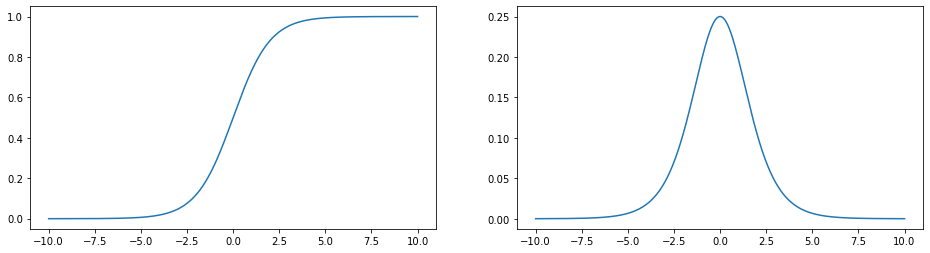

In [9]:
x = np.linspace(-10,10,1000)
y0 = sigmoid(x)
y1 = sigmoid_derivative(x)

fig = plt.figure(figsize = (16,9))
plt.subplot(221)
plt.plot(x,y0)

plt.subplot(222)
plt.plot(x,y1)

plt.show()

## Apprentissage et descente de gradient

Après avoir vu comment construire un réseau de  neurones numériques, nous allons maintenant aborder comment celui-ci est capable d'apprendre à reconnaître des structures à partir d'une base de données.

In [10]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Nous allons mettre en place un réseau de neurones et écrire la procédure de propagation de l'entrée vers la sortie (feedforward), en utilisant la fonction sigmoïde définit ci-dessus. Pour cela nous allons utiliser les **classes**. Une classe est un objet Python qui peut contenir différentes attributs (des variables,...) et méthodes (fonctions,...). Voici un exemple : on souhaite créer un nouvel objet qui représente un rectangle et ses propriétés. On peut aller définir la classe Rectangle comme ceci:

In [11]:
class Rectangle():
    
    def __init__(self, a, b):
        self.largeur = a
        self.longueur = b
        
    def aire(self):
        return self.largeur * self.longueur
    
    def perimetre(self):
        return 2 * self.largeur + 2 * self.longueur

Les attributs et fonctions définits sous la classe Rectangle doivent commencer par une **tabulation**. Le mot clé `self` fait référence à la classe elle-même et donc à ses attributs. La fonction `__init__` est obligatoire et permet d'initiliaser l'objet Rectangle comme ceci:

In [12]:
r = Rectangle(1, 2)

Puis les méthodes s'appliquent à l'instance `r` de l'objet Rectangle comme ceci:

In [13]:
print(r.aire(), r.perimetre())

2 6


Nous allons créer une classe Network qui va contenir les méthodes et attributs nécessaires au fonctionnement d'un réseau de neurones. Pour le moment voici une classe générique que **vous devrez remplir tout au long du TD:**

In [62]:
class NeuralNetwork:
    
    def __init__(self, x, y):
        self.input = x
        self.y = y
        self.output = np.zeros_like(self.y)
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        
        
    def feedforward(self):
        self.layer1 = sigmoid(self.input @ self.weights1)
        self.output = sigmoid(self.layer1 @ self.weights2)
       
    
    def backprop(self, eta=1):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights1 = self.input.T @ ( (2*(self.output - self.y) * sigmoid_derivative(self.layer1 @ self.weights2) @ self.weights2.T) * sigmoid_derivative(self.input @ self.weights1))
        d_weights2 = self.layer1.T @ (2*(self.output - self.y) * sigmoid_derivative(self.layer1 @ self.weights2) )

        # update the weights with the derivative (slope) of the loss function
        self.weights2 = self.weights2 - eta * d_weights2
        self.weights1 = self.weights1 - eta * d_weights1
        
    def cost(self):
        return np.sum((self.output-self.y)**2)

    def prediction(self, x):
        self.layer1 = sigmoid(x @ self.weights1)
        return sigmoid(self.layer1 @ self.weights2)
    





Le réseau de neurones que l'on souhaite coder a une architecture très simple:
* un vecteur d'entrée de taille 3
* 1 couche cachée de 4 neurones
* un vecteur de sortie de taille 1

représentée sur la figure suivante:

![](https://cdn-images-1.medium.com/max/1116/1*sX6T0Y4aa3ARh7IBS_sdqw.png)

Suite au visionnage des deux premières vidéos, commencer par:
* remplir la fonction `__init__`: 
    * stocker les données d'entrée `x` dans un attribut de classe `input`
    * stocker les données de sortie `y` dans un attribut de classe `y`
    * préparer un attribut `output` qui sera un vecteur nul de même taille que `y`
    * préparer un attribut `weights1`, une matrice $\mathbf{W}_1$ de nombres aléatoires pour les poids reliant un vecteur d'entrée à une couche de 4 neurones de taille (Nx, 4) avec [np.random.rand](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html)
    * préparer un attribut `weights2`, une matrice $\mathbf{W}_2$ de nombres aléatoires pour les poids reliant la couche de 4 neurones à la sortie de taille (4, 1)
    
On réalisera par la suite des multiplications matricielles "à gauche" pour des raisons de format du tableau `x` d'entrée.
    
* remplir la fonction `feedforward`: remplacer les `None` par une seule ligne de code
    * `self.layer1` est un vecteur qui doit contenir la valeur d'activation $a^{(1)}$ des 4 neurones étant donnés les poids d'entrée $\mathbf{W}_1$ et les inputs $x$
    $$ a^{(1)} = \sigma( \mathbf{W}_1 x)), \quad z^{(1)} = \mathbf{W}_1 x$$
    * `self.output` est un vecteur qui doit contenir la réponse $a^{(2)}$ du neurone de sortie étant donnés les valeurs d'activation des neurones précédents $a^{(1)}$ et des poids de sortie $\mathbf{W}_2$.
    $$ a^{(2)} = \sigma( \mathbf{W}_2 a^{(1)}), \quad z^{(2)} = \mathbf{W}_2 a^{(1)}$$

## Apprentissage : fonction coût

L'apprentissage revient donc à minimiser une fonction coût (analogue à un $\chi^2$), qui dépend d'un très grand nombre de paramètres. Les algorithmes de minimisation numérique efficaces, qu'ils soient à 1 ou plusieurs paramètres, utilisent le gradient de la fonction à minimiser, comme la [méthode de Newton](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Newton) vue en première année.

In [14]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ilg3gGewQ5U" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Suite au visionnage de cette troisième vidéo, remplissez la fonction `cost` qui retourne la valeur de la fonction coût du réseau de neurones:
$$ C = \Vert a^{(2)} - y \Vert ^2 $$

## Apprentissage : minimisation de la fonction coût

In [15]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/tIeHLnjs5U8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Back-propagation

On rappelle que la dérivée de la fonction coût s'écrit:
$$ C = (a^{(2)} - y ) ^T \cdot (a^{(2)} - y ) \Rightarrow \frac{\partial C}{\partial \mathbf{W}} = 2\left[ \frac{\partial a^{(2)}}{\partial \mathbf{W}}\right]^T \cdot (a^{(2)} - y )$$
La minimisation de la fonction coût se réalise par une [descente de gradient](https://en.wikipedia.org/wiki/Gradient_descent)  qui le long du chemin met à jour les paramètres de la fonction par:
$$ \mathbf{W} \rightarrow \mathbf{W} - \eta \frac{\partial C}{\partial \mathbf{W}} $$
avec $\eta$ le *taux d'apprentissage*. On choisira $\eta=1$ et on fera bien attention aux signes. Faire les calculs à la main avant de coder est recommandé.

Suite au visionnage de cette quatrième vidéo, remplissez la fonction `backprop`:
* d_weights2 représente $\partial C / \partial \mathbf{W}_2$
* d_weights1 représente $\partial C / \partial \mathbf{W}_1$
* mettre à jour `self.weights1` et  `self.weights2` 



## Mise en pratique

On cherche à savoir quels sont les facteurs de risques prépondérants pour développer un diabète. On dispose des données suivantes:

| $x_1 =$ obésité | $x_2 =$ sport | $x_3 = $ genre | $y=$ diabete |
| --------------- | ---------------| ---------------| -------------|
| 0 | 0 | 1 | 0 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 0 |

Evidemment ces données sont fausses... mais sont instructives sur l'utilité d'un réseau de neurones.

Mettre les données d'entrée sous forme d'une matrice `x` de taille (4, 3) et la sortie `y` sous forme d'une matrice (4, 1). Vérifier les `shape` de vos tableaux: `x.shape=(4, 3), y.shape=(4, 1)`.

In [19]:
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0],[1],[1],[0]])
print(y.shape)


(4, 1)


Mettre en oeuvre la minimisation de la fonction coût: 
* créer une instance de votre réseau de neurones avec ces données d'entrée et sortie
* ouvrir une boucle de $N$ pas et à chaque itération:
    * calculer la sortie `output`
    * utiliser la fonction `backprop` pour minimiser  $C$ et mettre à jour les poids
    * stocker le résultat de la fonction coût dans un vecteur

In [67]:
NN=NeuralNetwork(x,y)
N =500
cout = np.zeros(N)
for n in range(N):
    NN.feedforward()
    NN.backprop(eta = 10)
    
    cout[n] = NN.cost()

y_fin = NN.output


* Imprimer à l'écran la valeur finale de la fonction coût et de la sortie. Tracer la valeur de la fonction coût en fonction du numéro du pas. Que constatez-vous ?

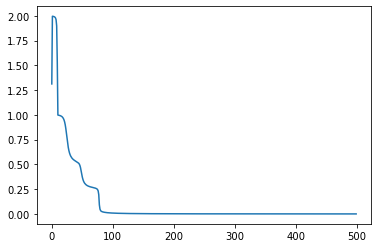

[[0.00618888]
 [0.99066419]
 [0.98820589]
 [0.01509535]]


In [68]:
fig = plt.figure()
plt.plot(range(N),cout)
plt.show()

print(y_fin)

* Faire varier le taux d'apprentissage $\eta$. Qu'est-ce que cela change sur l'apprentissage ?

LA REPONSE ICI (double-clique pour editer la cellule)

* Utiliser votre réseau de neurones pour établir le risque de diabete pour d'autres jeux de données que vous inventerez. Pour cela remplissez la fonction `prediction(x)` qui, pour un nouveau jeu de données `x` et avec les poids déterminer par l'apprentissage précédent, calcule le risque de contracter un diabète.

In [70]:
x2 = np.array([[1,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = NN.prediction(x2)

### Remarques conclusives

A travers cet exemple l'objectif est de comprendre ce qu'il se trame derrière l'apprentissage d'un réseau de neurones simple. Pour les réseaux de neurones plus complexes, les concepts et enjeux sont les mêmes mais les opérations et les algortihmes sont plus complexes. Aujourd'hui, en python il existe la libraire [scikit-learn](https://scikit-learn.org/stable/) qui regroupe énormement d'algorithmes de machine learning et qui permet d'écrire des codes python d'une dizaine de lignes.



## Pour aller plus loin...

### Un réseau de neurones simple en ligne

Sur le site https://playground.tensorflow.org/ il est possible de simuler en ligne l'apprentissage d'un réseau de neurones avec nombre de neurones et un nombre de couches arbitraires. Les jeux de données proposés sont à 2 dimensions $(x_1, x_2)$, et il est possible de nourrir directement le réseau avec ces données, ou leurs sinus, leurs produits, etc... (colonne *Features*). Plusieurs fonctions d'activation sont proposées dans les menus déroulants. Après avoir appuyé sur *Play* on visualise l'évolution de la courbe d'apprentissage ainsi que la construction des fontières pour la classification des données.

### Un réseau de neurones pour classer des chiffres manuscripts

Le site http://neuralnetworksanddeeplearning.com/chap2.html propose un livre en ligne sur le machine learning très complet. Le lien ci-dessus propose un cours qui suit la progression de ce TD et des vidéos, ainsi qu'un [code simple](http://neuralnetworksanddeeplearning.com/chap1.html#implementing_our_network_to_classify_digits) qui permet de créer une réseau de neurones entrainés sur des chiffres manuscripts (base de données [MNIST](https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST)). Le code permettant l'import des données est fourni avec le TD, et le code permettant la création et l'entrainement d'un réseau simple est reproduit ci-dessous. Etudiez-le et remarquez à quel point il ressemble au vôtre, alors que les données sont bien plus complexes. En voici un extrait :

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Les lignes ci-dessous permettent de charger les données, séparées en trois lots :

In [ ]:
from mnist import *

training_data, validation_data, test_data = load_data_wrapper()

In [ ]:
plot_images_together(get_images(training_data))

In [ ]:
import random

class Network2():

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test));
            else:
                print("Epoch {} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_derivative(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_derivative(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)


In [ ]:
training_data, validation_data, test_data = load_data_wrapper()

net = Network2([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Le taux affiché représente le pourcentage de réussite de l'entrainement après $N=$`epochs` iterations. Vous pouvez faire varier certains paramètres et voir leur influence sur le processus.

### Tutoriels scikit-learn

Pour aller plus loin, il est recommandé de suivre les tutoriels fournis avec la librairie scikit-learn: https://scikit-learn.org/stable/tutorial/index.html
Sans forcément expliquer les mathématiques et l'algorithmes sous-jacents aux outils proposés, ils permettent d'avoir une introduction pratique au machine learning, comme dans l'exemple ci-dessous:

In [ ]:
from sklearn import datasets

digits = datasets.load_digits()

print("Données :",digits.data)  
print("Sorties :",digits.target)

In [ ]:
n_digits = 10
fig, ax = plt.subplots(1,n_digits,figsize=(n_digits*2,6))
for i in range(n_digits):
    ax[i].imshow(digits.images[i], cmap="Greys")
    ax[i].set_title(f"Chiffre : {digits.target[i]}")
plt.show()

Ici l'exemple utilise le [Support Vector Machine](https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support) pour catégoriser les chiffres, 3 lignes suffisent :

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])  

n_digits = 10
pred = clf.predict(digits.data[-n_digits:])
print(pred)

fig, ax = plt.subplots(1,n_digits,figsize=(n_digits*2,6))
for i in range(n_digits):
    ax[i].imshow(digits.images[-n_digits+i], cmap="Greys")
    ax[i].set_title(f"Chiffre reconnu: {pred[i]}")
plt.show()